In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Country-wide Covid19 dataset.
df=pd.read_csv("countrywide_covid19_dataset.csv")
df

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0
...,...,...,...,...,...,...,...,...,...
6598,2020-05-18,St. Barth,9874,NaN,6.0,NaN,6.0,NaN,0.0
6599,2020-05-18,Western Sahara,595462,NaN,6.0,NaN,6.0,NaN,0.0
6600,2020-05-18,Anguilla,14987,NaN,3.0,NaN,3.0,NaN,0.0
6601,2020-05-18,Lesotho,2140235,NaN,1.0,NaN,NaN,NaN,1.0


In [3]:
#Loading the dataset of general population at different age groups for every country.
df1=pd.read_csv("population_structure.csv")
df1

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185
...,...,...,...,...
208,St. Barth,NaN,NaN,NaN
209,Western Sahara,NaN,NaN,NaN
210,Anguilla,NaN,NaN,NaN
211,Lesotho,0.354,0.601,0.045


In [4]:
# Checking unique entries in each of the column of Country wide covid19 dataset.
df.nunique().to_frame().transpose()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,31,213,213,3173,3257,1185,2268,529,2680


In [5]:
# Checking unique entries in each of the column of age-wise population structure dataset.
df1.nunique().to_frame().transpose()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,213,136,118,109


In [6]:
#Updating dataset of Fraction age population with dataset of Covid19 in a for loop.
for i in df1.columns[1:]:
    df[i]=np.NaN
df=df.set_index('Country')
df1=df1.set_index('Country')
df.update(df1)
df.reset_index(inplace=True)

In [7]:
df

,Country,Date,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,2020-04-18,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,Russia,2020-04-18,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0,0.176,0.682,0.142
2,Spain,2020-04-18,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0,0.147,0.659,0.194
3,Brazil,2020-04-18,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0,0.217,0.697,0.086
4,UK,2020-04-18,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0,0.177,0.638,0.185
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,St. Barth,2020-05-18,9874,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN
6599,Western Sahara,2020-05-18,595462,NaN,6.0,NaN,6.0,NaN,0.0,NaN,NaN,NaN
6600,Anguilla,2020-05-18,14987,NaN,3.0,NaN,3.0,NaN,0.0,NaN,NaN,NaN
6601,Lesotho,2020-05-18,2140235,NaN,1.0,NaN,NaN,NaN,1.0,0.354,0.601,0.045


In [8]:
# Checking the shape of the data
df.shape

(6603, 12)

In [9]:
# Checking the no. of columns
df.columns

Index(['Country', 'Date', 'Population', 'Total Tests', 'Total Cases',
       'Total Deaths', 'Total Recovered', 'Serious or Critical',
       'Active Cases', 'Fraction age 0-14 years', 'Fraction age 15-64 years',
       'Fraction age 65+ years'],
      dtype='object')

In [10]:
#Checking for datatypes of the columns
df.dtypes

Country                      object
Date                         object
Population                    int64
Total Tests                 float64
Total Cases                 float64
Total Deaths                float64
Total Recovered             float64
Serious or Critical         float64
Active Cases                float64
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

Observation: Only Country and Date columns are object datatype. Rest of the columns are float datatypes.

# Checking for missing values

In [11]:
#Checking the no. of missing values in the columns.
df.isnull().sum()

Country                        0
Date                           0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

Observation:
1. There are 1098 null values in Total Tests column.
2. There are 49 null values in Total Cases column.
3. There are 1236 null values in Total Deaths column.
4. There are 285 null values in Total Recovered column.
5. There are 2486 null values in Serious or Critical column.
6. There are 59 null values in Active Cases column.
7. There are 1147 null values in Fraction age 0-14 years, Fraction age 15-64 years and Fraction age 65+ years column in that order.
8. Since, all of these columns are are continuous in nature, I will be imputing the null values with their mean.

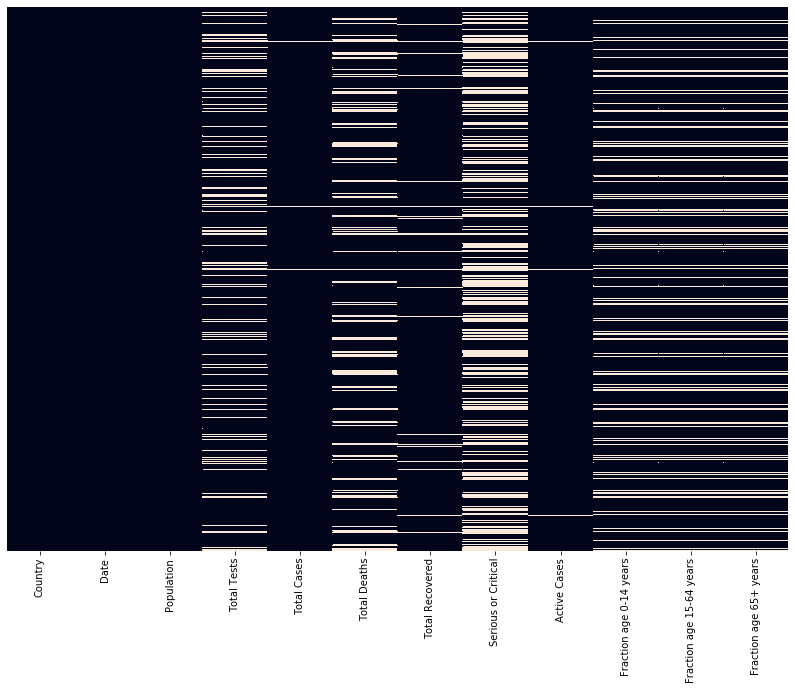

In [12]:
# Seeing the null values with the help of heatmap.
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
#Filling all the missing values with their mean.
cols = ["Total Tests", "Total Cases", "Total Deaths", "Total Recovered", "Serious or Critical", "Active Cases", "Fraction age 0-14 years", "Fraction age 15-64 years", "Fraction age 65+ years"]
df[cols]=df[cols].fillna(df.mean().iloc[0])

In [14]:
#Checking again the no. of missing values in the columns.
df.isnull().sum()

Country                     0
Date                        0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

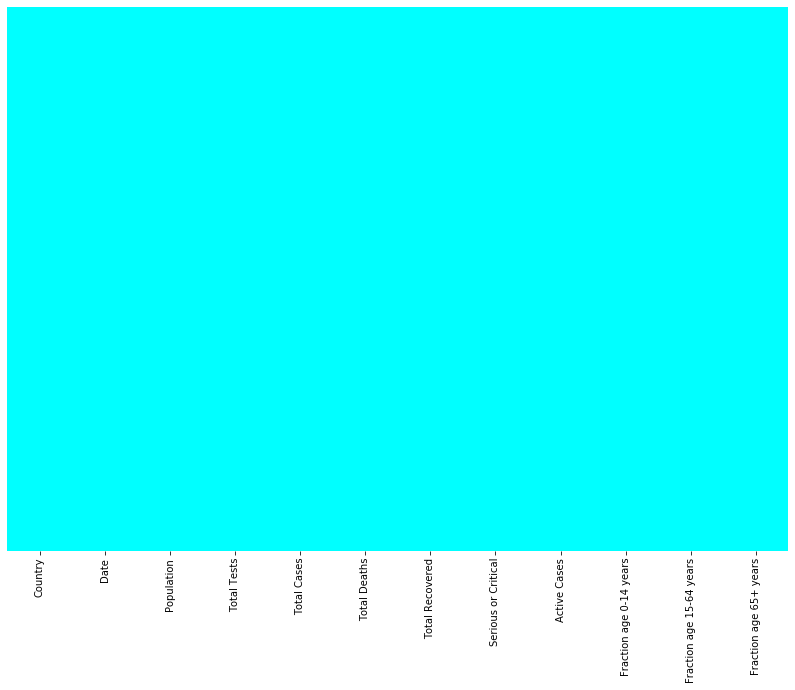

In [15]:
# Visualizing null values, if any,
plt.figure(figsize=(14,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='cool')

# Exploring the categorical datatype and their unique values.

In [16]:
# Printing the object data type columns and their unique values

for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+' : '+str(df[column].unique()))
        print(df[column].value_counts())
        print('*******************************************************************************')
        print('\n')

Country : ['USA' 'Russia' 'Spain' 'Brazil' 'UK' 'Italy' 'France' 'Germany' 'Turkey'
 'Iran' 'India' 'Peru' 'China' 'Canada' 'Saudi Arabia' 'Belgium' 'Mexico'
 'Chile' 'Netherlands' 'Pakistan' 'Qatar' 'Ecuador' 'Switzerland'
 'Belarus' 'Sweden' 'Portugal' 'Singapore' 'Ireland' 'UAE' 'Bangladesh'
 'Poland' 'Ukraine' 'Indonesia' 'Romania' 'Israel' 'South Africa' 'Japan'
 'Colombia' 'Austria' 'Kuwait' 'Egypt' 'Dominican Republic' 'Philippines'
 'S. Korea' 'Denmark' 'Serbia' 'Panama' 'Czechia' 'Argentina' 'Norway'
 'Algeria' 'Bahrain' 'Afghanistan' 'Australia' 'Morocco' 'Malaysia'
 'Kazakhstan' 'Finland' 'Nigeria' 'Moldova' 'Ghana' 'Oman' 'Armenia'
 'Bolivia' 'Luxembourg' 'Iraq' 'Hungary' 'Cameroon' 'Azerbaijan'
 'Thailand' 'Greece' 'Guinea' 'Uzbekistan' 'Honduras' 'Sudan' 'Senegal'
 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Ivory Coast' 'Guatemala'
 'Cuba' 'North Macedonia' 'Iceland' 'Estonia' 'Tajikistan' 'Lithuania'
 'DRC' 'Djibouti' 'New Zealand' 'Slovakia' 'Slovenia' 'Somalia' 'Ga

# Summary Statistics

In [17]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
count,6.603000e+03,6.603000e+03,6.603000e+03,6.603000e+03,6.603000e+03,6.603000e+03,6.603000e+03,6.603000e+03,6.603000e+03,6.603000e+03
mean,3.637913e+07,6.230101e+06,2.867688e+05,6.810875e+06,1.575806e+06,1.369682e+07,3.349347e+05,6.319380e+06,6.319380e+06,6.319379e+06
std,1.411537e+08,1.348354e+07,3.122243e+06,1.419064e+07,7.392449e+06,1.762708e+07,3.423349e+06,1.378360e+07,1.378360e+07,1.378360e+07
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.150000e-01,4.720000e-01,1.100000e-02
25%,8.672680e+05,4.733000e+03,8.000000e+01,8.000000e+00,2.900000e+01,7.000000e+00,2.700000e+01,1.910000e-01,6.070000e-01,3.800000e-02
50%,6.859926e+06,5.419500e+04,6.320000e+02,5.500000e+01,2.530000e+02,1.370000e+02,2.840000e+02,2.900000e-01,6.590000e-01,8.500000e-02
75%,2.546422e+07,4.233585e+05,5.222500e+03,2.729000e+03,1.786500e+03,3.637913e+07,2.230500e+03,4.320000e-01,7.090000e-01,1.910000e-01
max,1.439324e+09,3.637913e+07,3.637913e+07,3.637913e+07,3.637913e+07,3.637913e+07,3.637913e+07,3.637913e+07,3.637913e+07,3.637913e+07


# Checking correlation

In [18]:
df_cor=df.corr()
df_cor

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Population,1.000000,0.060559,-0.013666,-0.096477,-0.034372,-0.025430,-0.014184,-0.117643,-0.117643,-0.117643
Total Tests,0.060559,1.000000,0.192646,0.176713,0.181958,0.282446,0.170139,0.196971,0.196971,0.196971
Total Cases,-0.013666,0.192646,1.000000,0.177627,0.407727,0.107352,0.911267,-0.042095,-0.042095,-0.042095
Total Deaths,-0.096477,0.176713,0.177627,1.000000,0.224495,0.417180,0.155264,0.326171,0.326171,0.326171
Total Recovered,-0.034372,0.181958,0.407727,0.224495,1.000000,0.175895,0.447569,0.041941,0.041941,0.041941
Serious or Critical,-0.025430,0.282446,0.107352,0.417180,0.175895,1.000000,0.086892,0.162662,0.162662,0.162662
Active Cases,-0.014184,0.170139,0.911267,0.155264,0.447569,0.086892,1.000000,-0.044855,-0.044855,-0.044855
Fraction age 0-14 years,-0.117643,0.196971,-0.042095,0.326171,0.041941,0.162662,-0.044855,1.000000,1.000000,1.000000
Fraction age 15-64 years,-0.117643,0.196971,-0.042095,0.326171,0.041941,0.162662,-0.044855,1.000000,1.000000,1.000000
Fraction age 65+ years,-0.117643,0.196971,-0.042095,0.326171,0.041941,0.162662,-0.044855,1.000000,1.000000,1.000000


Here we can see the correlation between the columns. For better understanding we can see it via visualization(with the help of heatmap)

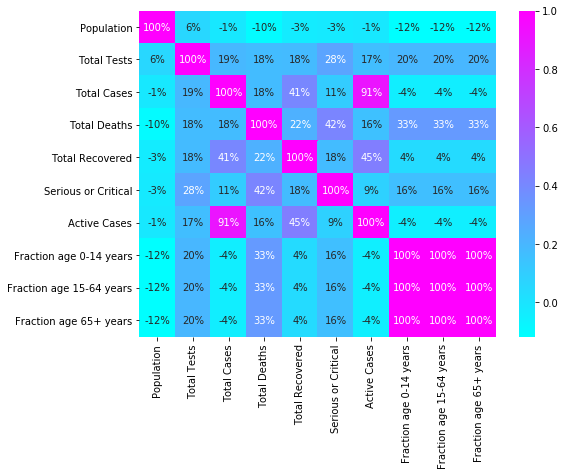

In [19]:
# Correlation via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='cool')
plt.show()

Text(0.5, 1.0, 'Correlation with target variable')

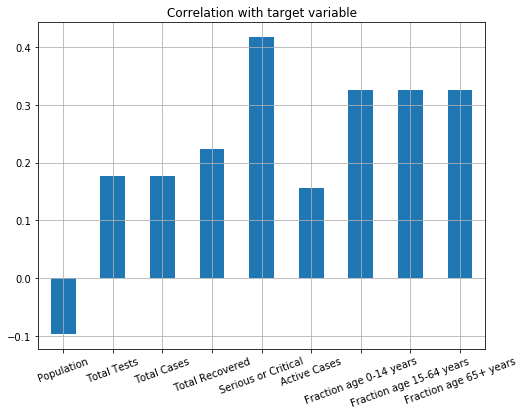

In [20]:
# Checking the correlation with target variable
plt.figure(figsize=(8,6))
df.drop('Total Deaths',axis=1).corrwith(df['Total Deaths']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with target variable")

Observation: Except Population column, all the attributes are positively correlated.

In [21]:
df= df.rename(columns={'Total Tests':'Total_Tests','Total Cases':'Total_Cases','Total Deaths':'Total_Deaths','Total Recovered':'Total_Recovered','Active Cases':'Active_Cases'})

In [22]:
top = df[df['Date'] == df['Date'].max()]
world = top.groupby('Country')['Total_Cases','Active_Cases','Total_Deaths','Total_Recovered'].sum().reset_index()
world.head()

,Country,Total_Cases,Active_Cases,Total_Deaths,Total_Recovered
0,Afghanistan,7072.0,6098.0,173.0,801.0
1,Albania,948.0,190.0,31.0,727.0
2,Algeria,7201.0,3021.0,555.0,3625.0
3,Andorra,761.0,86.0,51.0,624.0
4,Angola,50.0,30.0,3.0,17.0


# Data Visualization

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

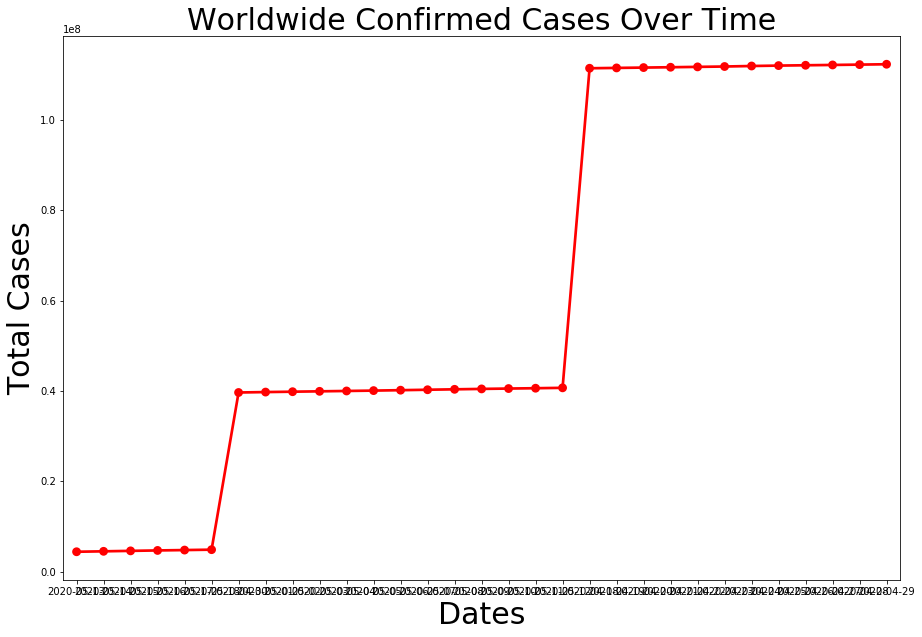

In [23]:
#CONFIRMED CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby(by='Date')['Total_Cases'].sum().sort_values(ascending=True).reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Total_Cases,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

Observation: Worldwide confirmed cases have increased over the given period.

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

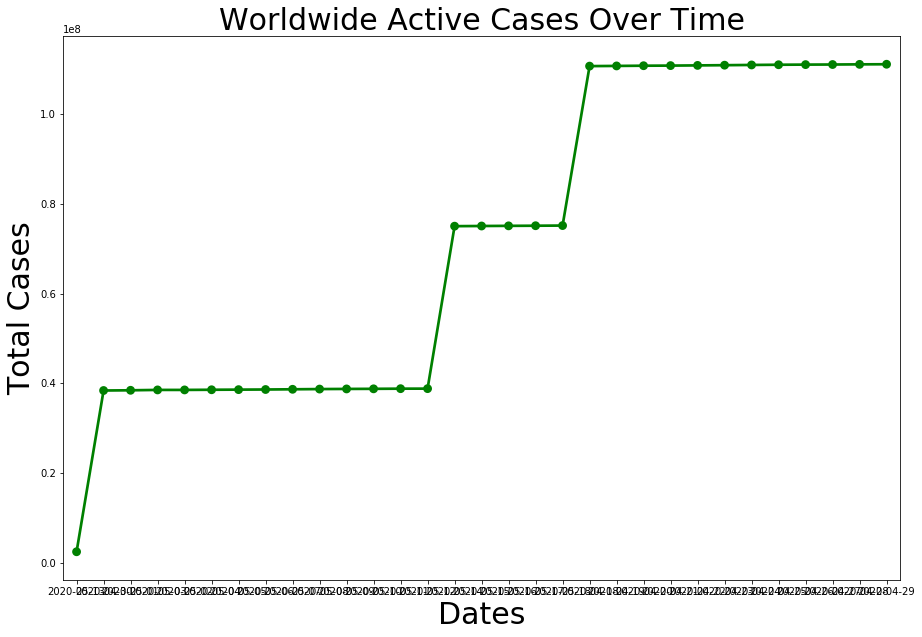

In [24]:
#ACTIVE CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Active Cases Over Time",fontsize=30)
total_cases = df.groupby(by='Date')['Active_Cases'].sum().sort_values(ascending=True).reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Active_Cases,color='g')
a.set(xlabel="Dates",ylabel="Total Cases")

Observation: Worldwide active cases have increased over the given period.

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

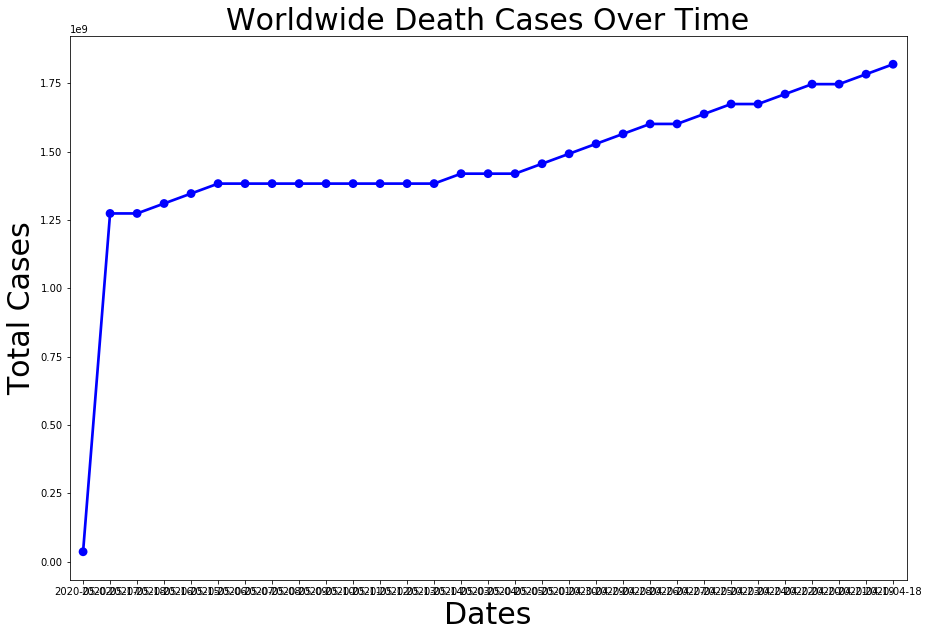

In [25]:
#DEATH CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Death Cases Over Time",fontsize=30)
total_cases = df.groupby(by='Date')['Total_Deaths'].sum().sort_values(ascending=True).reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Total_Deaths,color='b')
a.set(xlabel="Dates",ylabel="Total Cases")

Observation: Worldwide death cases have increased over the given period.

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

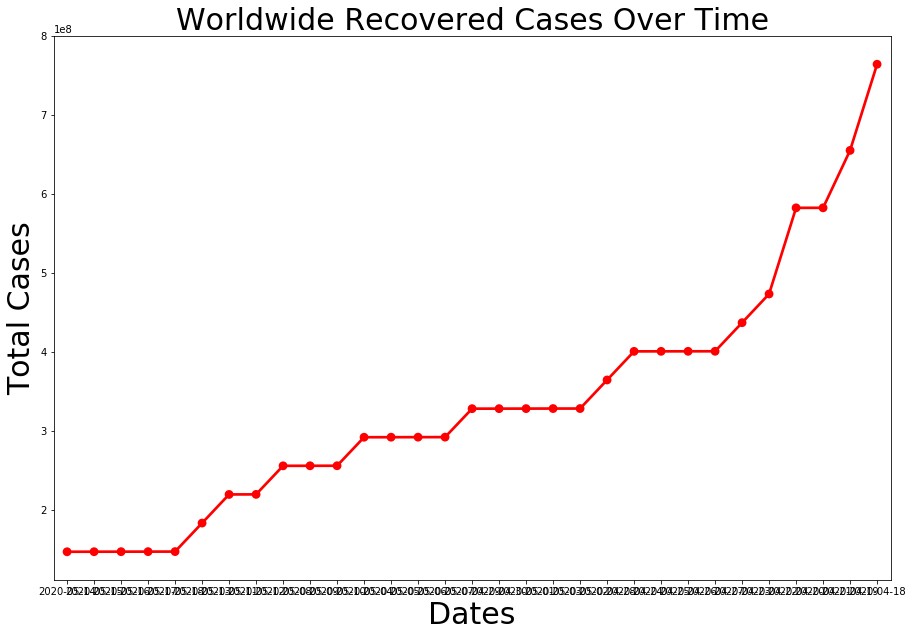

In [26]:
#RECOVERED CASES
plt.figure(figsize=(15,10))
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total Cases",fontsize=30)
plt.title("Worldwide Recovered Cases Over Time",fontsize=30)
total_cases = df.groupby(by='Date')['Total_Recovered'].sum().sort_values(ascending=True).reset_index()
total_cases['Date'] = pd.to_datetime(total_cases['Date'])
a = sns.pointplot(x = total_cases.Date.dt.date,y=total_cases.Total_Recovered,color='r')
a.set(xlabel="Dates",ylabel="Total Cases")

Observation: Worldwide recovered cases have increased over the given period.

# Top 20 Countries

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

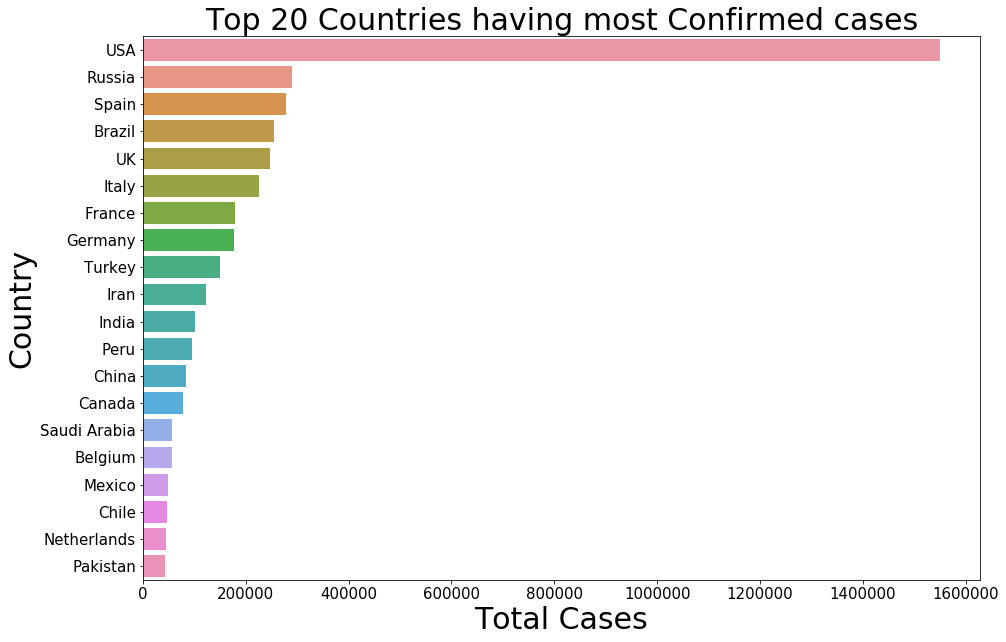

In [27]:
#Top 20 Countries having most Confirmed cases.
top_confirm= top.groupby(by='Country')['Total_Cases'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Confirmed cases",fontsize=30)
ax = sns.barplot(x=top_confirm.Total_Cases,y=top_confirm.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

Observation: Top counrties having most number of confirmed cases over the given period are USA, Russia and Spain in that order.

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

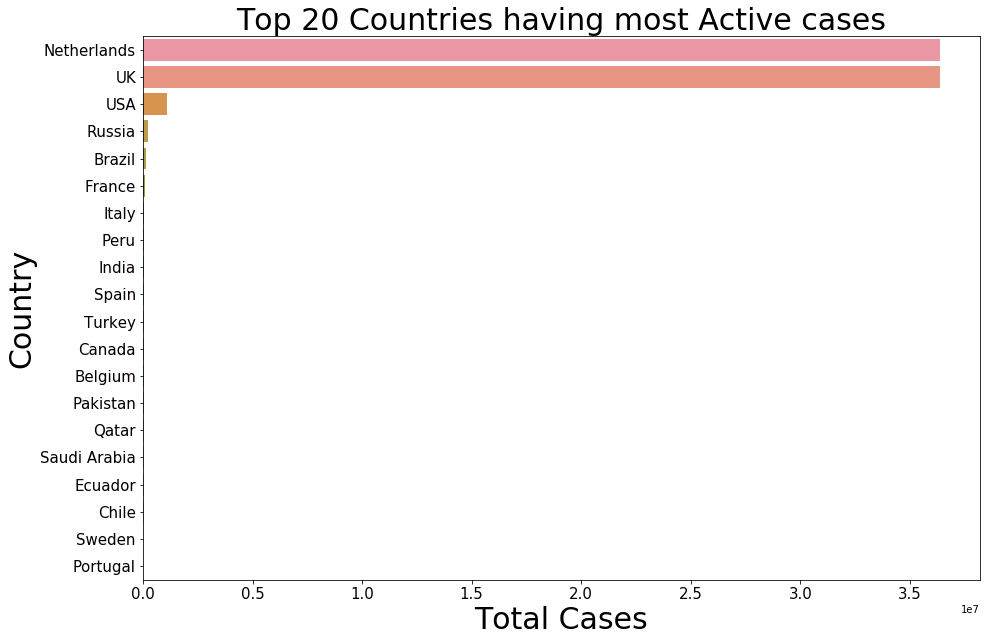

In [28]:
#Top 20 Countries having most Active cases.
top_actives= top.groupby(by='Country')['Active_Cases'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Active cases",fontsize=30)
ax = sns.barplot(x=top_actives.Active_Cases,y=top_actives.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

Observation: Top counrties having most number of active cases over the given period are Netherlands, UK and USA in that order

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total Cases')]

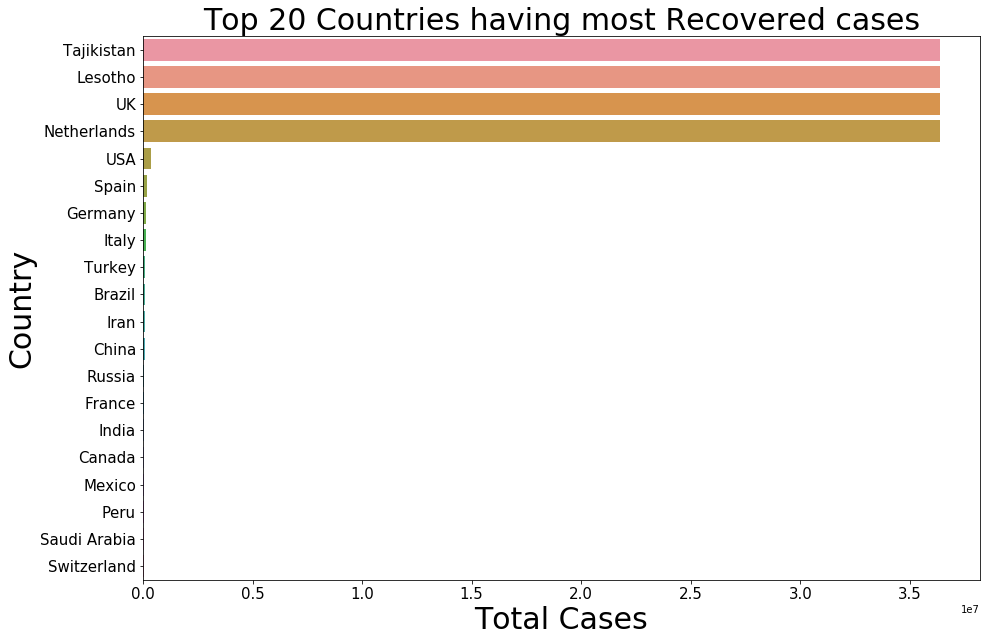

In [29]:
top_recover= top.groupby(by='Country')['Total_Recovered'].sum().sort_values(ascending=False).reset_index().head(20)

plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total Cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 Countries having most Recovered cases",fontsize=30)
ax = sns.barplot(x=top_recover.Total_Recovered,y=top_recover.Country)
ax.set(xlabel="Total Cases",ylabel="Country")

Observation: Top counrties having most number of recovered cases over the given period are Tajikistan, Lesotho, UK and Netherlands in that order.

# Analysis on Some Countries

In [30]:
# CHINA, US, ITALY and INDIA

china = df[df.Country == 'China']
china = china.groupby(by='Date')['Total_Recovered','Active_Cases','Total_Cases','Total_Deaths'].sum().reset_index()


us = df[df.Country == 'USA']
us = us.groupby(by='Date')['Total_Recovered','Active_Cases','Total_Cases','Total_Deaths'].sum().reset_index()

italy = df[df.Country == 'Italy']
italy = italy.groupby(by='Date')['Total_Recovered','Active_Cases','Total_Cases','Total_Deaths'].sum().reset_index()


india = df[df.Country == 'India']
india = india.groupby(by='Date')['Total_Recovered','Active_Cases','Total_Cases','Total_Deaths'].sum().reset_index()


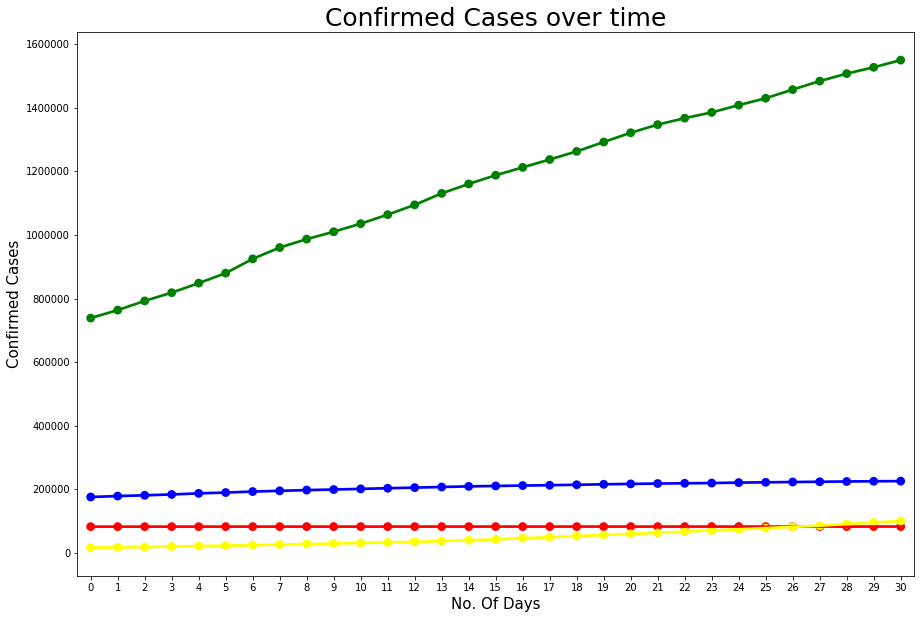

In [31]:
# Visualization of Confirmed Cases over time of countries India, China, USA and Italy.
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Total_Cases,color="Red")
sns.pointplot(us.index,us.Total_Cases,color="Green")
sns.pointplot(italy.index,italy.Total_Cases,color="Blue")
sns.pointplot(india.index,india.Total_Cases,color="Yellow")
plt.title("Confirmed Cases over time", fontsize=25)
plt.ylabel("Confirmed Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

Observation: USA has the most no. of confirmed cases over the given period. Followed by Italy and China. India has the least no. of confirmed cases among these four countries.

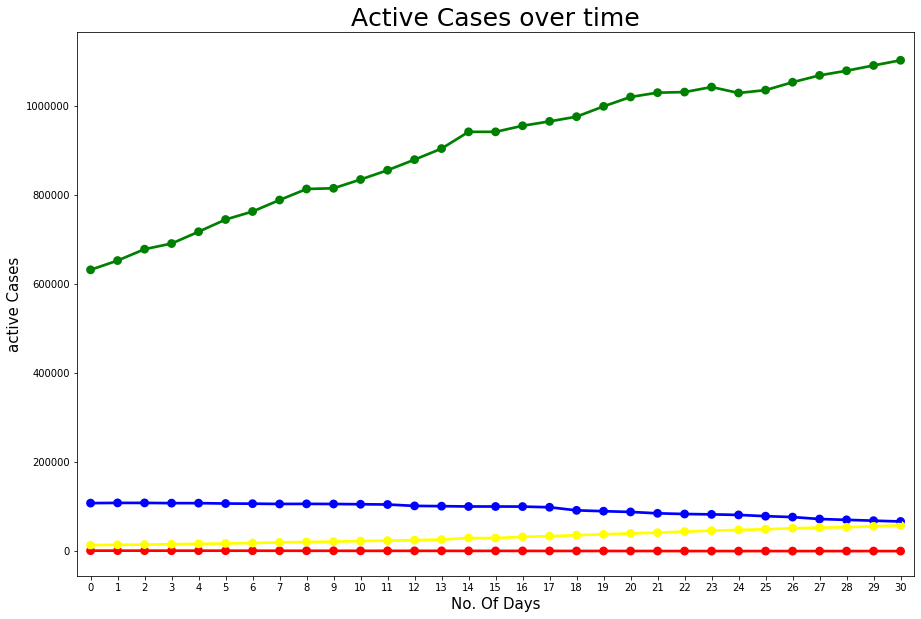

In [32]:
# Visualization of Active Cases over time of countries India, China, USA and Italy.
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Active_Cases,color="Red")
sns.pointplot(us.index,us.Active_Cases,color="Green")
sns.pointplot(italy.index,italy.Active_Cases,color="Blue")
sns.pointplot(india.index,india.Active_Cases,color="Yellow")
plt.title("Active Cases over time", fontsize=25)
plt.ylabel("active Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

Observation: USA has the most no. of active cases over the given period. Followed by Italy and India. China has the least no. of active cases among these four countries.

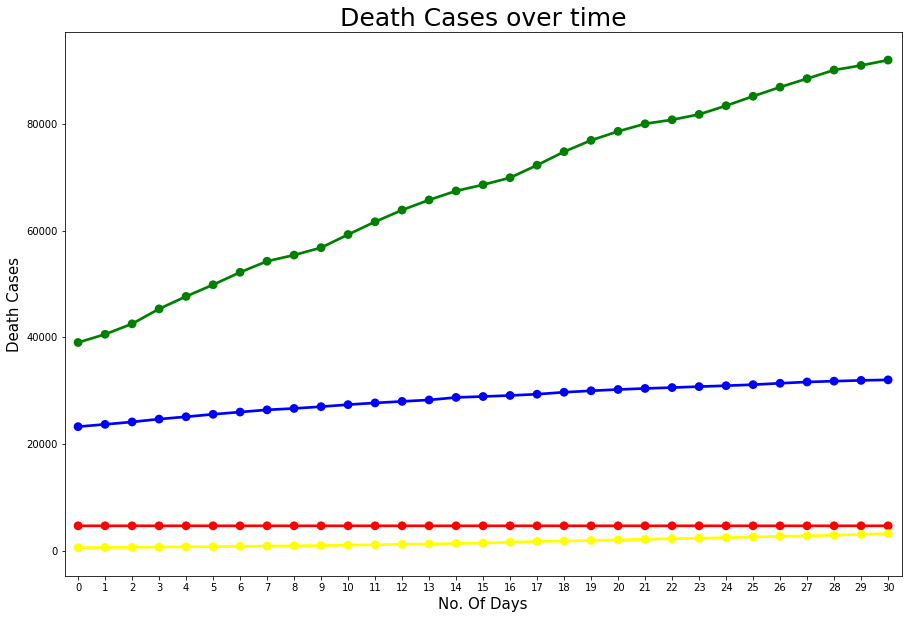

In [33]:
# Visualization of Death Cases over time of countries India, China, USA and Italy.
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Total_Deaths,color="Red")
sns.pointplot(us.index,us.Total_Deaths,color="Green")
sns.pointplot(italy.index,italy.Total_Deaths,color="Blue")
sns.pointplot(india.index,india.Total_Deaths,color="Yellow")
plt.title("Death Cases over time", fontsize=25)
plt.ylabel("Death Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

Observation: USA has the most no. of death cases over the given period. Followed by Italy and China. India has the least no. of active cases among these four countries.

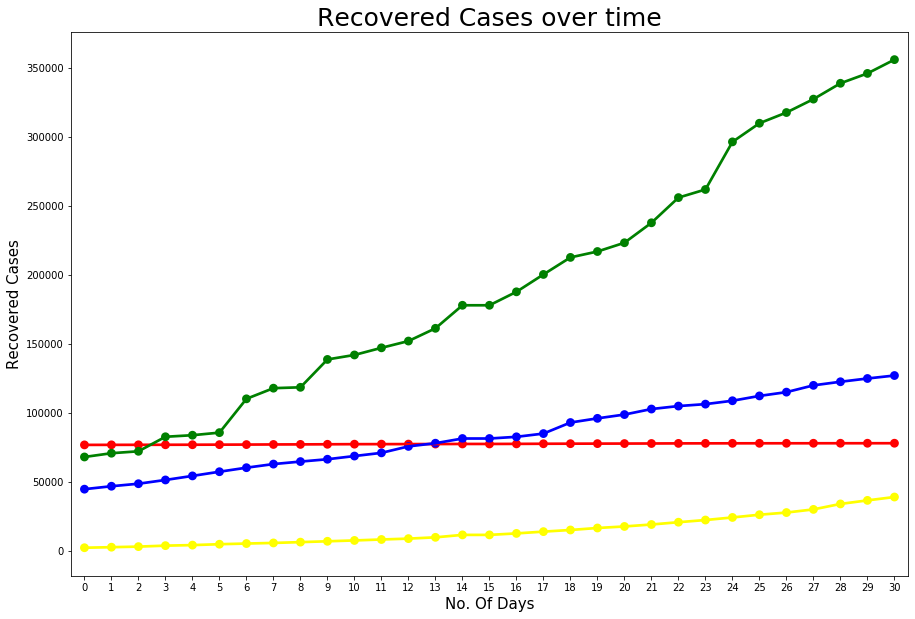

In [34]:
# Visualization of Recovered Cases over time of countries India, China, USA and Italy.
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.Total_Recovered,color="Red")
sns.pointplot(us.index,us.Total_Recovered,color="Green")
sns.pointplot(italy.index,italy.Total_Recovered,color="Blue")
sns.pointplot(india.index,india.Total_Recovered,color="Yellow")
plt.title("Recovered Cases over time", fontsize=25)
plt.ylabel("Recovered Cases",fontsize=15)
plt.xlabel("No. Of Days",fontsize=15)
plt.show()

Observation: USA has the most no. of recovered cases over the given period. The recovery is declining in case of China. While recovery of Italy is sharper as compared to India.

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list=['Country','Date']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [36]:
df

,Country,Date,Population,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Serious or Critical,Active_Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,201,0,330774664,3.722145e+06,738792.0,3.901400e+04,6.826900e+04,1.355100e+04,631509.0,1.890000e-01,6.570000e-01,1.540000e-01
1,158,0,145927292,1.831892e+06,36793.0,3.130000e+02,3.057000e+03,8.000000e+00,33423.0,1.760000e-01,6.820000e-01,1.420000e-01
2,180,0,46752703,9.302300e+05,194416.0,2.004300e+04,7.479700e+04,7.371000e+03,99576.0,1.470000e-01,6.590000e-01,1.940000e-01
3,26,0,212380932,6.298500e+04,36722.0,2.361000e+03,1.402600e+04,6.634000e+03,20335.0,2.170000e-01,6.970000e-01,8.600000e-02
4,200,0,67844241,4.604370e+05,114217.0,1.546400e+04,3.637913e+07,1.559000e+03,98409.0,1.770000e-01,6.380000e-01,1.850000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
6598,182,30,9874,3.637913e+07,6.0,3.637913e+07,6.000000e+00,3.637913e+07,0.0,3.637913e+07,3.637913e+07,3.637913e+07
6599,209,30,595462,3.637913e+07,6.0,3.637913e+07,6.000000e+00,3.637913e+07,0.0,3.637913e+07,3.637913e+07,3.637913e+07
6600,5,30,14987,3.637913e+07,3.0,3.637913e+07,3.000000e+00,3.637913e+07,0.0,3.637913e+07,3.637913e+07,3.637913e+07
6601,110,30,2140235,3.637913e+07,1.0,3.637913e+07,3.637913e+07,3.637913e+07,1.0,3.540000e-01,6.010000e-01,4.500000e-02


# Checking skewness

In [37]:
df.skew()

Country                      0.000000
Date                         0.000000
Population                   8.743503
Total_Tests                  1.783545
Total_Cases                 11.467695
Total_Deaths                 1.604274
Total_Recovered              4.496897
Serious or Critical          0.509931
Active_Cases                10.433374
Fraction age 0-14 years      1.722885
Fraction age 15-64 years     1.722885
Fraction age 65+ years       1.722885
dtype: float64

In [38]:
# Treating skewness via square root method and cube root method.
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [39]:
#Checking skewness again.
df.skew()

Country                      0.000000
Date                         0.000000
Population                   4.004943
Total_Tests                  1.709430
Total_Cases                 10.725073
Total_Deaths                 1.603635
Total_Recovered              4.476468
Serious or Critical          0.509931
Active_Cases                10.078343
Fraction age 0-14 years      1.722885
Fraction age 15-64 years     1.722885
Fraction age 65+ years       1.722885
dtype: float64

# Plotting Outliers

In [40]:
collist=df.columns.values
ncol=12
nrows=10

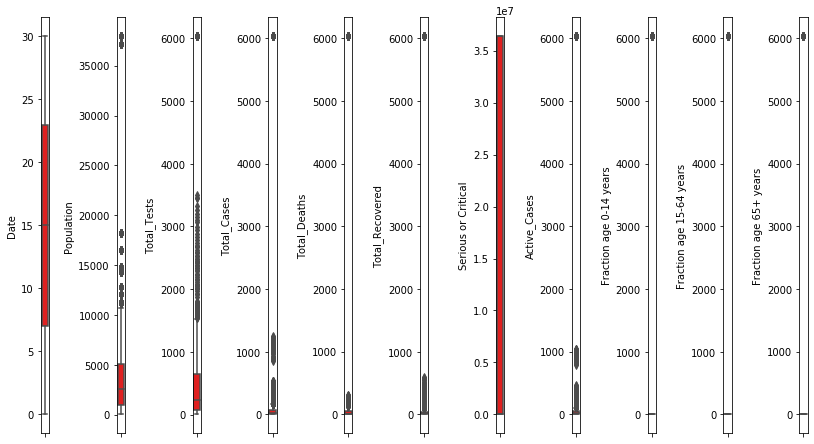

In [41]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

Observtion: There are some outliers present in the dataset which needs to be removed.

In [42]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(6603, 12)
(6225, 12)


Findings: Outliers were present in 378 rows which now have been removed with the help of zscore.

# Model Buiding

In [46]:
#Splitting the data into input and output variable.
x=df_new.drop(columns=['Total_Deaths'],axis=1)
x.head()

,Country,Date,Population,Total_Tests,Total_Cases,Total_Recovered,Serious or Critical,Active_Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
1,158,0,12080.036920,1353.474049,191.815015,55.290144,8.0,182.819583,0.419524,0.825833,0.376829
2,180,0,6837.594826,964.484318,440.926298,273.490402,7371.0,315.556651,0.383406,0.811788,0.440454
3,26,0,14573.295166,250.968125,191.629852,118.431415,6634.0,142.600842,0.465833,0.834865,0.293258
5,98,0,7776.369590,1142.730502,419.434143,211.959902,2733.0,328.284937,0.367423,0.796869,0.479583
6,69,0,8078.169718,680.927309,389.606211,189.691855,5833.0,310.623566,0.425441,0.788670,0.443847


In [47]:
y=df_new['Total_Deaths']
y.head()

1     17.691806
2    141.573303
3     48.590122
5    152.404068
6    139.007194
Name: Total_Deaths, dtype: float64

In [48]:
#Checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(6225, 11) 		 (6225,)


In [49]:
# Scaling the input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [50]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [51]:
# Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(4980, 11) 		 (1245, 11)


In [52]:
# Checking the shape
print(y_train.shape,'\t\t',y_test.shape)

(4980,) 		 (1245,)


In [53]:
# Importing our Models Library
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [54]:
# Using algorithms via for loop

model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m, 'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2_score:',r2_score(y_test,predm))
    print('**************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.22054491777354424
Error:
Mean absolute error: 1364.170767567636
Mean squared error: 3898080.1744841565
Root Mean Squared Error: 1974.3556352603136
r2_score: 0.2852667429922485
**************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is: 1.0
Error:
Mean absolute error: 63.26841671808421
Mean squared error: 379796.3495944039
Root Mean Squared Error: 616.2761958687062
r2_score: 0.9303623656275399
******************************************************

In [55]:
# Cross validating the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('Score of',m,'is:')
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard deviation:',score.std())
    print('*************************************************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is:
Score: [0.25420406 0.24528963 0.15880773 0.2377866  0.24258176]
Mean Score: 0.22773395438881133
Standard deviation: 0.03487465016065323
*************************************************************************************************


Score of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') is:
Score: [0.72951065 0.88918467 0.73794537 0.99999969 0.72838062]
Mean Score: 0.8170041985549341
Standard deviation: 0.10996083663772425
*************************************************************************************************


Score of KNeighborsReg

# Random Forest Regressor is giving the best score and r2 score so I choose RFR as final model.

Using GridSearchCV to find the best parameters

In [56]:
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFR=RandomForestRegressor()

clf=GridSearchCV(RFR,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 600}


In [57]:
# Using RandomForestRegressor wiith its best parameters

rf=RandomForestRegressor(n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=15)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score",r2_score(y_test,y_pred))
print('\n')

Score: 0.9941627461892766


Mean Absolute Error: 104.03921509596537
Mean Squared Error 270031.07679253153
Root Mean Squared Error: 519.6451450677968


r2_score 0.9504883988090942




In [60]:
#Saving the model

#Importing joblib
from sklearn.externals import joblib

#saving the model as an object in a file
joblib.dump(rf,'countrywide_covid19_rf.obj')

['countrywide_covid19_rf.obj']

In [61]:
# Loading the model
rf_from_joblib=joblib.load('countrywide_covid19_rf.obj')

In [62]:
# using the loaded model to make predictions

prediction=rf_from_joblib.predict(x_test)
prediction

array([ 9.7785337 , 11.4652441 ,  1.73205081, ..., 19.13522438,
        2.8629961 ,  3.32713677])

In [63]:
res = pd.DataFrame(prediction)

res.columns = ["prediction"]
res.to_csv("countrywide_covid19_rf.csv")